In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('GameOfThrones.csv')
data

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [4]:
del data['Type']
del data['book']

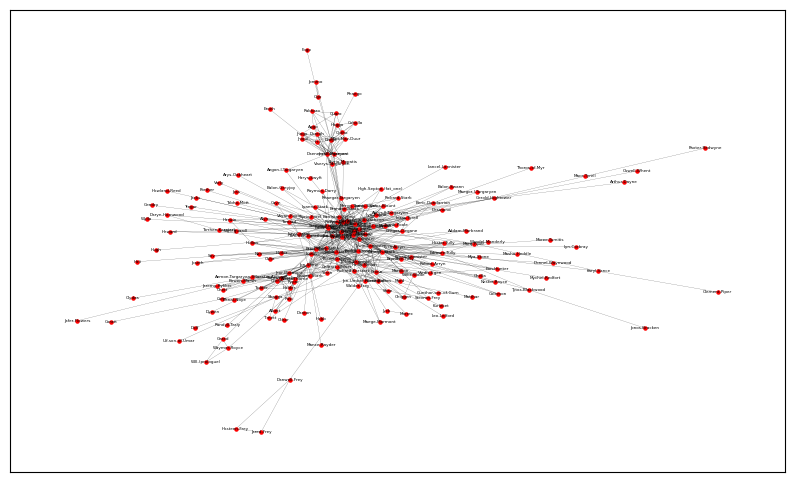

In [5]:
# создадим граф и заполним его данными нашего датасета
Graf = nx.from_pandas_edgelist(data, 'Source', 'Target', ['weight'])

# задаём формат размещения элементов графа для визуализации
pos = nx.spring_layout(Graf)
# pos = nx.circular_layout(Graf)

# выбираем что будет в качестве лейблов (веса)
labels = nx.get_edge_attributes(Graf,'weight')

# задаём размер полотна
plt.figure(figsize=(10,6))

# выводим граф на экран
nx.draw_networkx(Graf,
        pos,
        with_labels=True,
        node_color='red',
        node_size=5,       # размер метки узла
        width=0.1,         # толщина линии ребра
        font_size=3)       # размер шрифта лейблов

# добавляем отрисовку лейблов для рёбер
# nx.draw_networkx_edge_labels(Graf, pos)
plt.show()

**1. Проверить наличие компонент связности**

In [6]:
connectivity = nx.is_connected(Graf)
print('Наличие компонент связности:', connectivity)

Наличие компонент связности: True


**2. Проложить кратчайший маршрут (по расстоянию, drive) от дома до университета**

In [9]:
import osmnx as ox

In [10]:
G = ox.graph_from_place("Москва, Россия", network_type="drive")

In [11]:
# координаты дома и университета
my_address = (55.488014,37.294556) # Микрорайон В 15, Троицк, Москва, Россия
rudn_address = (55.710702, 37.603747) # Орджоникидзе 3, Москва, Россия

In [12]:
# ближайшие узлы к заданным точкам
my_address = ox.nearest_nodes(G, my_address[1], my_address[0])
rudn_address = ox.nearest_nodes(G, rudn_address[1], rudn_address[0])

In [13]:
# кратчайший маршрут
route = ox.shortest_path(G,
                         my_address,
                         rudn_address,
                         weight="length")

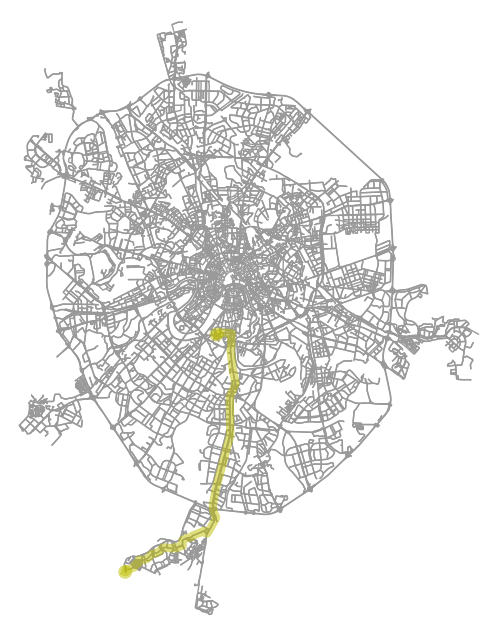

In [14]:
fig, ax = ox.plot_graph_route(G,
                              route,             # маршрут
                              route_color="y",   # цвет линии маршрута
                              route_linewidth=6, # толщина линии маршрута
                              node_size=0,
                              bgcolor='#ffffff')

**3. Проложить кратчайший маршрут (по времени, drive) от дома до университета**

In [15]:
for u, v, k, data in G.edges(data=True, keys=True):
    data["travel_time"] = data["length"] / 80.0  #  средняя скорость движения 80 км/ч

In [16]:
route = ox.shortest_path(G,
                         my_address,
                         rudn_address,
                         weight="travel_time")

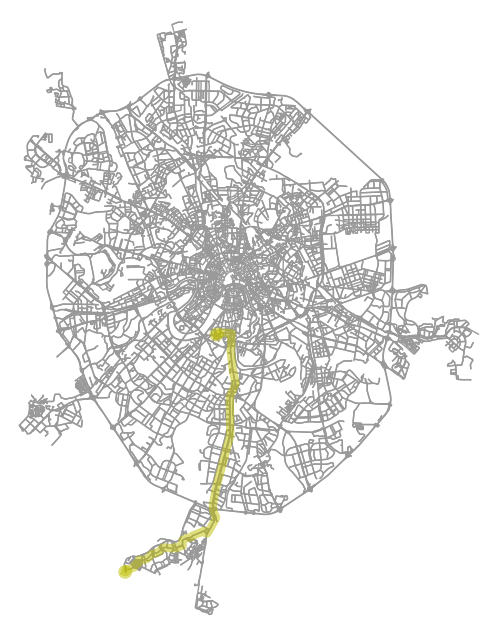

In [17]:
fig, ax = ox.plot_graph_route(G,
                              route,
                              route_color="y",
                              route_linewidth=6,
                              node_size=0,
                              bgcolor='#ffffff')

**4. Проложить кратчайший маршрут (по расстоянию, walk) от дома до университета**

In [ ]:
G = ox.graph_from_place("Москва, Россия", network_type="walk")

In [18]:
# кратчайший маршрут
route = ox.shortest_path(G,
                         my_address,
                         rudn_address,
                         weight="length")

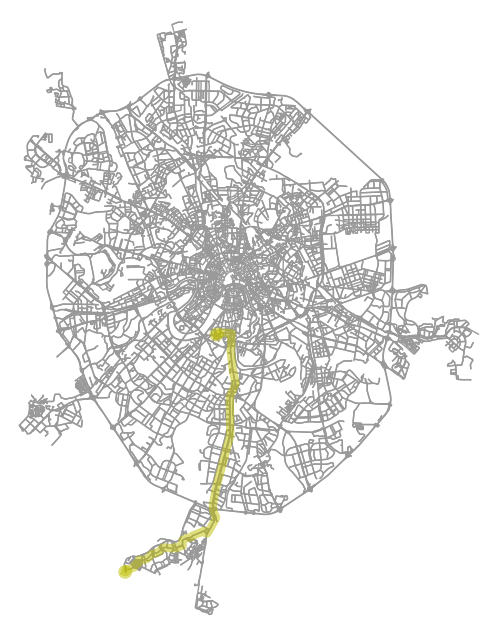

In [19]:
fig, ax = ox.plot_graph_route(G,
                              route,             # маршрут
                              route_color="y",   # цвет линии маршрута
                              route_linewidth=6, # толщина линии маршрута
                              node_size=0,
                              bgcolor='#ffffff')

**5. Проложить кратчайший маршрут (по времени, walk) от дома до университета**

In [ ]:
for u, v, k, data in G.edges(data=True, keys=True):
    data["travel_time"] = data["length"] / 5.0  #  средняя скорость движения 80 км/ч

In [20]:
route = ox.shortest_path(G,
                         my_address,
                         rudn_address,
                         weight="travel_time")

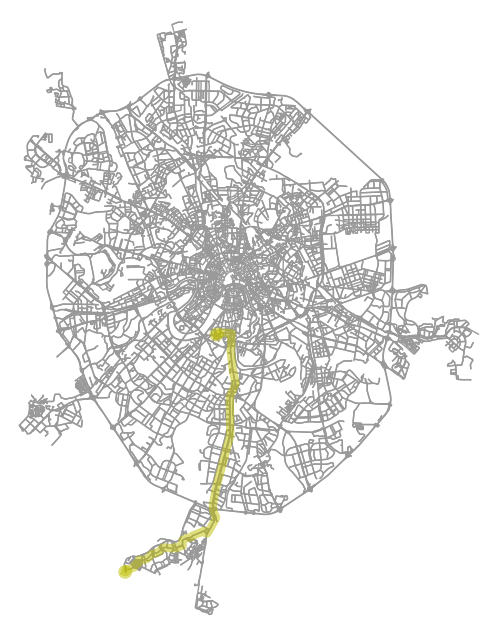

In [21]:
fig, ax = ox.plot_graph_route(G,
                              route,
                              route_color="y",
                              route_linewidth=6,
                              node_size=0,
                              bgcolor='#ffffff')

In [8]:
%pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.3 MB/s eta 0:00:00
